In [2]:
library(affy)
library(affycoretools)

In [3]:
main <- read.csv('data/TGGATES/open_tggates_main.csv',header=TRUE,fileEncoding='LATIN1')

In [4]:
head(main)

COMPOUND_NAME                         COMPOUND_ABBREVIATION COMPOUND_NO
1 1% cholesterol + 0.25% sodium cholate CH+DS-Na              00161      
2 2,4-dinitrophenol                     DNP                   00154      
3 2-nitrofluorene                       2NF                   00160      
4 3-methylcholanthrene                  3-MC                  00166      
5 acarbose                              ACA                   00116      
6 acetamide                             AAA                   00169      
  Human...in.vitro                                                                                                  
1                                                                                                                   
2 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/2%2C4-dinitrophenol.Human.in_vitro.Liver.zip
3 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/2-nitrofluorene.Human.in_vitro.Liver.zip    
4                                                                                                                   
5 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/acarbose.Human.in_vitro.Liver.zip           
6 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/acetamide.Human.in_vitro.Liver.zip          
  Rat...in.vitro                                                                                     
1                                                                                                    
2                                                                                                    
3                                                                                                    
4                                                                                                    
5 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vitro/acarbose.Rat.in_vitro.Liver.zip
6                                                                                                    
  Rat...in.vivo...Liver...Single                                                                                                   
1                                                                                                                                  
2 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/2%2C4-dinitrophenol.Rat.in_vivo.Liver.Single.zip 
3 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/2-nitrofluorene.Rat.in_vivo.Liver.Single.zip     
4 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/3-methylcholanthrene.Rat.in_vivo.Liver.Single.zip
5 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/acarbose.Rat.in_vivo.Liver.Single.zip            
6                                                                                                                                  
  Rat...in.vivo...Liver...Repeat                                                                                                                          
1 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/1%25_cholesterol_%2B_0.25%25_sodium_cholate.Rat.in_vivo.Liver.Repeat.zip
2 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/2%2C4-dinitrophenol.Rat.in_vivo.Liver.Repeat.zip                        
3                                                                                                                                                         
4                                                                                                                                                         
5 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/acarbose.Rat.in_vivo.Liver.Repeat.zip                                   
6 ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/acetamide.Rat.i

In [5]:
attfiles <- list.files('data/TGGATES/cel/rat/',pattern='Attribute.tsv',recursive=TRUE,full.names=TRUE)
attfiles <- attfiles[!grepl('No ChipData',attfiles)]
meta <- do.call(rbind,lapply(
    attfiles,
    read.delim,sep='\t',header=TRUE,fileEncoding='LATIN1'
))

In [6]:
meta <- subset(meta,BARCODE!='No ChipData')
dim(meta)

[1] 12701    66

In [7]:
head(meta)

BARCODE    ARR_DESIGN EXP_ID GROUP_ID INDIVIDUAL_ID ORGAN_ID MATERIAL_ID
1 3017337003 Rat230_2   5171   1        1             Liver    A          
2 3017337004 Rat230_2   5171   1        2             Liver    A          
3 3017337011 Rat230_2   5171   2        1             Liver    A          
4 3017337012 Rat230_2   5171   2        2             Liver    A          
5 3017337019 Rat230_2   5171   3        1             Liver    A          
6 3017337020 Rat230_2   5171   3        2             Liver    A          
  COMPOUND_NAME COMPOUND.Abbr. COMPOUND_NO ... IP.mg.dL. TP.g.dL. RALB.g.dL.
1 acarbose      ACA            116         ... NA        NA       NA        
2 acarbose      ACA            116         ... NA        NA       NA        
3 acarbose      ACA            116         ... NA        NA       NA        
4 acarbose      ACA            116         ... NA        NA       NA        
5 acarbose      ACA            116         ... NA        NA       NA        
6 acarbose      ACA            116         ... NA        NA       NA        
  A.G AST.IU.L. ALT.IU.L. LDH.IU.L. GTP.IU.L. DNA... LDH...
1 NA  NA        NA        NA        NA        101.2  100.2 
2 NA  NA        NA        NA        NA         98.8   99.8 
3 NA  NA        NA        NA        NA        102.7   99.5 
4 NA  NA        NA        NA        NA         97.3  100.5 
5 NA  NA        NA        NA        NA         97.9   99.6 
6 NA  NA        NA        NA        NA        102.1  100.4

In [8]:
celdirs <- list.dirs('data/TGGATES/cel/rat/liver',recursive=TRUE,full.names=TRUE)

In [9]:
celdirs <- celdirs[grep('celfiles',celdirs)]
head(celdirs)

[1] "data/TGGATES/cel/rat/liver/2-nitrofluorene.Rat.in_vivo.Liver.Single/celfiles"     
[2] "data/TGGATES/cel/rat/liver/2,4-dinitrophenol.Rat.in_vivo.Liver.Single/celfiles"   
[3] "data/TGGATES/cel/rat/liver/3-methylcholanthrene.Rat.in_vivo.Liver.Single/celfiles"
[4] "data/TGGATES/cel/rat/liver/acarbose.Rat.in_vivo.Liver.Single/celfiles"            
[5] "data/TGGATES/cel/rat/liver/acetamidofluorene.Rat.in_vivo.Liver.Single/celfiles"   
[6] "data/TGGATES/cel/rat/liver/acetaminophen.Rat.in_vivo.Liver.Single/celfiles"

In [10]:
length(celdirs)

[1] 158

In [11]:
celfiles <- list.celfiles(celdirs)

In [12]:
matched.names <- sapply(as.character(meta$BARCODE),function(bc){
    celfiles[grep(bc,celfiles)][1]
})

In [13]:
length(matched.names)

[1] 12701

In [14]:
meta <- meta[!is.na(matched.names),]

In [15]:
dim(meta)

[1] 7378   66

In [16]:
rownames(meta) <- matched.names[!is.na(matched.names)]

In [17]:
meta$CEL <- rownames(meta)

In [18]:
meta$SACRI_PERIOD <- factor(meta$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

In [19]:
dim(meta)

[1] 7378   67

In [20]:
length(celfiles)

[1] 7378

In [21]:
celfiles[!(celfiles %in% rownames(meta))]

character(0)

In [22]:
meta.full <- data.frame(meta)

In [23]:
selected.compounds <- levels(meta.full$COMPOUND_NAME)

In [24]:
meta <- subset(meta.full,COMPOUND_NAME %in% selected.compounds)
dim(meta)

[1] 7378   67

In [25]:
meta$CEL <- factor(meta$CEL)

In [26]:
meta$COMPOUND_NAME <- factor(meta$COMPOUND_NAME)

In [27]:
meta$SACRI_PERIOD <- factor(meta$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

In [28]:
combn <- with(meta,paste(ORGAN_ID,COMPOUND_NAME,DOSE,SACRI_PERIOD,sep='.'))
ref.idx <- meta$DOSE==0 & meta$SACRI_PERIOD=='3 hr'

combn <- relevel(factor(combn),ref=combn[ref.idx][1])

In [29]:
meta$combn <- combn

In [30]:
levels(meta$COMPOUND_NAME)

[1] "acarbose"                        "acetamidofluorene"              
  [3] "acetaminophen"                   "acetazolamide"                  
  [5] "adapin"                          "ajmaline"                       
  [7] "allopurinol"                     "allyl alcohol"                  
  [9] "amiodarone"                      "amitriptyline"                  
 [11] "aspirin"                         "azathioprine"                   
 [13] "bendazac"                        "benzbromarone"                  
 [15] "benziodarone"                    "bromobenzene"                   
 [17] "bromoethylamine"                 "bucetin"                        
 [19] "buthionine sulfoximine"          "caffeine"                       
 [21] "captopril"                       "carbamazepine"                  
 [23] "carbon tetrachloride"            "carboplatin"                    
 [25] "cephalothin"                     "chloramphenicol"                
 [27] "chlormadinone"                   "chlormezanone"                  
 [29] "chlorpheniramine"                "chlorpromazine"                 
 [31] "chlorpropamide"                  "cimetidine"                     
 [33] "ciprofloxacin"                   "cisplatin"                      
 [35] "clofibrate"                      "clomipramine"                   
 [37] "colchicine"                      "coumarin"                       
 [39] "cycloheximide"                   "cyclophosphamide"               
 [41] "cyclosporine A"                  "danazol"                        
 [43] "dantrolene"                      "diazepam"                       
 [45] "diclofenac"                      "diethyl maleate"                
 [47] "diltiazem"                       "disopyramide"                   
 [49] "disulfiram"                      "doxorubicin"                    
 [51] "enalapril"                       "erythromycin ethylsuccinate"    
 [53] "ethambutol"                      "ethanol"                        
 [55] "ethinylestradiol"                "ethionamide"                    
 [57] "ethionine"                       "etoposide"                      
 [59] "famotidine"                      "fenofibrate"                    
 [61] "fluphenazine"                    "flutamide"                      
 [63] "furosemide"                      "galactosamine"                  
 [65] "gemfibrozil"                     "gentamicin"                     
 [67] "glibenclamide"                   "griseofulvin"                   
 [69] "haloperidol"                     "hexachlorobenzene"              
 [71] "hydroxyzine"                     "ibuprofen"                      
 [73] "imipramine"                      "indomethacin"                   
 [75] "iproniazid"                      "isoniazid"                      
 [77] "ketoconazole"                    "labetalol"                      
 [79] "lomustine"                       "lornoxicam"                     
 [81] "LPS"                             "mefenamic acid"                 
 [83] "meloxicam"                       "metformin"                      
 [85] "methapyrilene"                   "methimazole"                    
 [87] "methyldopa"                      "methyltestosterone"             
 [89] "mexiletine"                      "monocrotaline"                  
 [91] "moxisylyte"                      "naphthyl isothiocyanate"        
 [93] "naproxen"                        "nicotinic acid"                 
 [95] "nifedipine"                      "nimesulide"                     
 [97] "nitrofurantoin"                  "nitrofurazone"                  
 [99] "nitrosodiethylamine"             "omeprazole"                     
[101] "papaverine"                      "pemoline"                       
[103] "penicillamine"                   "perhexiline"                    
[105] "phalloidin"                      "phenacetin"                     
[107] "phenobarbital"                   "phenylanthranilic acid"         
[109] 

In [31]:
tail(meta)

BARCODE      ARR_DESIGN EXP_ID GROUP_ID INDIVIDUAL_ID ORGAN_ID
003017689010.CEL 003017689010 Rat230_2   181    15       1             Liver   
003017689011.CEL 003017689011 Rat230_2   181    15       2             Liver   
003017689012.CEL 003017689012 Rat230_2   181    15       4             Liver   
003017688028.CEL 003017688028 Rat230_2   181    16       2             Liver   
003017688029.CEL 003017688029 Rat230_2   181    16       3             Liver   
003017688030.CEL 003017688030 Rat230_2   181    16       4             Liver   
                 MATERIAL_ID COMPOUND_NAME COMPOUND.Abbr. COMPOUND_NO ...
003017689010.CEL B           WY-14643      WY             30          ...
003017689011.CEL C           WY-14643      WY             30          ...
003017689012.CEL B           WY-14643      WY             30          ...
003017688028.CEL A           WY-14643      WY             30          ...
003017688029.CEL B           WY-14643      WY             30          ...
003017688030.CEL B           WY-14643      WY             30          ...
                 RALB.g.dL. A.G AST.IU.L. ALT.IU.L. LDH.IU.L. GTP.IU.L. DNA...
003017689010.CEL 2.6        0.9 74        45        74        1         NA    
003017689011.CEL 2.6        0.9 75        50        54        1         NA    
003017689012.CEL 2.6        0.9 77        49        47        2         NA    
003017688028.CEL 2.7        0.9 99        76        54        1         NA    
003017688029.CEL 2.6        1.0 66        47        47        2         NA    
003017688030.CEL 2.5        1.0 69        48        47        1         NA    
                 LDH... CEL              combn                   
003017689010.CEL NA     003017689010.CEL Liver.WY-14643.100.9 hr 
003017689011.CEL NA     003017689011.CEL Liver.WY-14643.100.9 hr 
003017689012.CEL NA     003017689012.CEL Liver.WY-14643.100.9 hr 
003017688028.CEL NA     003017688028.CEL Liver.WY-14643.100.24 hr
003017688029.CEL NA     003017688029.CEL Liver.WY-14643.100.24 hr
003017688030.CEL NA     003017688030.CEL Liver.WY-14643.100.24 hr

In [32]:
cel.paths <- list.celfiles(celdirs,full.names=TRUE)
names(cel.paths) <- gsub('.+/','',cel.paths)
cel.paths <- cel.paths[celfiles]

In [39]:
write.table(data.frame(cel_files=cel.paths[celfiles %in% rownames(meta)]),file='data/TGGATES/celfiles.txt',quote=FALSE,col.names=TRUE,row.names=FALSE)

In [40]:
system('/opt/apt_2.11.1_linux_64_bitx86_binaries/bin/apt-probeset-summarize -a rma-sketch -d data/TGGATES/Rat230_2.cdf -o data/TGGATES/rma_output --cel-files data/TGGATES/celfiles.txt')

In [33]:
expr.dat <- read.table('data/TGGATES/rma_output/rma-sketch.summary.txt',header=TRUE)

In [34]:
rownames(expr.dat) <- expr.dat[,1]
expr.dat[,1] <- NULL
colnames(expr.dat) <- gsub('X','',colnames(expr.dat))

In [35]:
dim(expr.dat)

[1] 31099  7378

In [36]:
eset <- ExpressionSet(as.matrix(expr.dat),AnnotatedDataFrame(meta[celfiles[celfiles %in% rownames(meta)],]))

In [37]:
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 31099 features, 7378 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 003017001001.CEL 003017001002.CEL ... 003017960001.CEL
    (7378 total)
  varLabels: BARCODE ARR_DESIGN ... combn (68 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

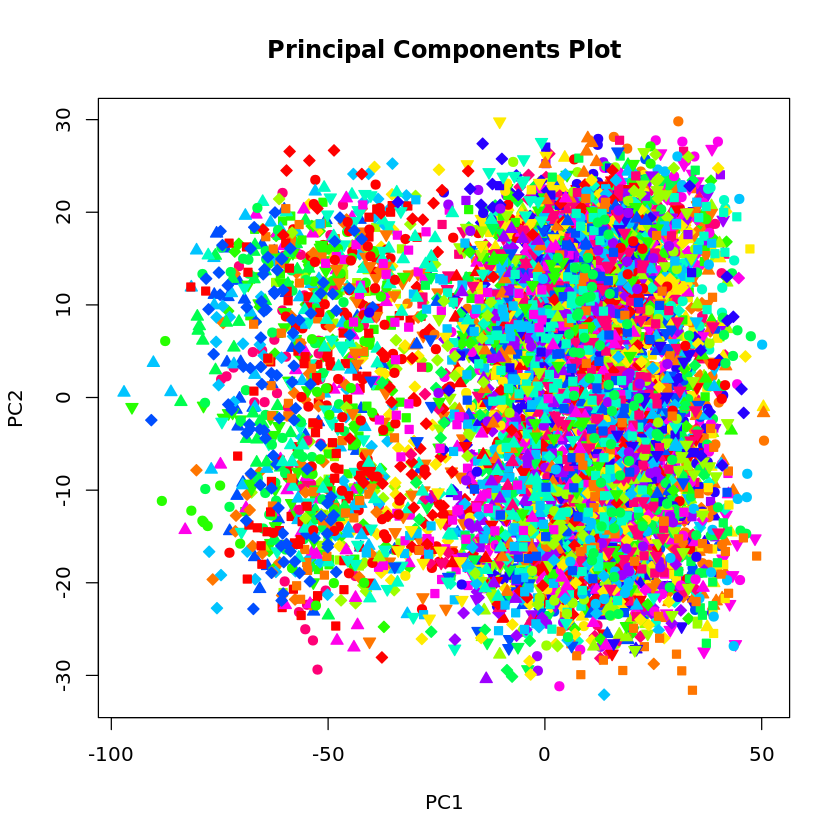

In [70]:
plotPCA(eset, groups =
 pData(eset)$COMPOUND_NAME, groupnames =
 levels(pData(eset)$COMPOUND_NAME), legend=FALSE)

In [38]:
library(limma)

Warning message:
"package 'limma' was built under R version 3.6.1"
Attaching package: 'limma'

The following object is masked from 'package:BiocGenerics':

    plotMA



In [39]:
design.all <- model.matrix(~0+combn,data=meta)
head(design.all)

combnLiver.2,4-dinitrophenol.0.3 hr
003017911030.CEL 0                                  
003017912001.CEL 0                                  
003017912002.CEL 0                                  
003017912003.CEL 0                                  
003017912004.CEL 0                                  
003017912005.CEL 0                                  
                 combnLiver.2-nitrofluorene.0.24 hr
003017911030.CEL 1                                 
003017912001.CEL 1                                 
003017912002.CEL 1                                 
003017912003.CEL 0                                 
003017912004.CEL 0                                 
003017912005.CEL 0                                 
                 combnLiver.2-nitrofluorene.100.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 1                                   
003017912004.CEL 1                                   
003017912005.CEL 1                                   
                 combnLiver.2-nitrofluorene.1000.24 hr
003017911030.CEL 0                                    
003017912001.CEL 0                                    
003017912002.CEL 0                                    
003017912003.CEL 0                                    
003017912004.CEL 0                                    
003017912005.CEL 0                                    
                 combnLiver.2-nitrofluorene.300.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 0                                   
003017912004.CEL 0                                   
003017912005.CEL 0                                   
                 combnLiver.2,4-dinitrophenol.0.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 0                                   
003017912004.CEL 0                                   
003017912005.CEL 0                                   
                 combnLiver.2,4-dinitrophenol.0.6 hr
003017911030.CEL 0                                  
003017912001.CEL 0                                  
003017912002.CEL 0                                  
003017912003.CEL 0                                  
003017912004.CEL 0                                  
003017912005.CEL 0                                  
                 combnLiver.2,4-dinitrophenol.0.9 hr
003017911030.CEL 0                                  
003017912001.CEL 0                                  
003017912002.CEL 0                                  
003017912003.CEL 0                                  
003017912004.CEL 0                                  
003017912005.CEL 0                                  
                 combnLiver.2,4-dinitrophenol.20.24 hr
003017911030.CEL 0                                    
003017912001.CEL 0                                    
003017912002.CEL 0                                    
003017912003.CEL 0                                    
003017912004.CEL 0                                    
003017912005.CEL 0                                    
                 combnLiver.2,4-dinitrophenol.20.3 hr ...
003017911030.CEL 0                                    ...
003017912001.CEL 0                                    ...
003017912002.CEL 0                                    ...
003017912003.CEL 0                                    ...
003017912004.CEL 0                                    ...
003017912005.CEL 0                                    ...
                 combnLiver.WY-14643.10.6 hr combnLiver.WY-14643.10.9 hr
003017911030.CEL 0                           0                          
003017912001.CEL 0                           0                          
00301791200

In [40]:
design <- model.matrix(~combn,data=meta)
head(design)

(Intercept) combnLiver.2-nitrofluorene.0.24 hr
003017911030.CEL 1           1                                 
003017912001.CEL 1           1                                 
003017912002.CEL 1           1                                 
003017912003.CEL 1           0                                 
003017912004.CEL 1           0                                 
003017912005.CEL 1           0                                 
                 combnLiver.2-nitrofluorene.100.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 1                                   
003017912004.CEL 1                                   
003017912005.CEL 1                                   
                 combnLiver.2-nitrofluorene.1000.24 hr
003017911030.CEL 0                                    
003017912001.CEL 0                                    
003017912002.CEL 0                                    
003017912003.CEL 0                                    
003017912004.CEL 0                                    
003017912005.CEL 0                                    
                 combnLiver.2-nitrofluorene.300.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 0                                   
003017912004.CEL 0                                   
003017912005.CEL 0                                   
                 combnLiver.2,4-dinitrophenol.0.24 hr
003017911030.CEL 0                                   
003017912001.CEL 0                                   
003017912002.CEL 0                                   
003017912003.CEL 0                                   
003017912004.CEL 0                                   
003017912005.CEL 0                                   
                 combnLiver.2,4-dinitrophenol.0.6 hr
003017911030.CEL 0                                  
003017912001.CEL 0                                  
003017912002.CEL 0                                  
003017912003.CEL 0                                  
003017912004.CEL 0                                  
003017912005.CEL 0                                  
                 combnLiver.2,4-dinitrophenol.0.9 hr
003017911030.CEL 0                                  
003017912001.CEL 0                                  
003017912002.CEL 0                                  
003017912003.CEL 0                                  
003017912004.CEL 0                                  
003017912005.CEL 0                                  
                 combnLiver.2,4-dinitrophenol.20.24 hr
003017911030.CEL 0                                    
003017912001.CEL 0                                    
003017912002.CEL 0                                    
003017912003.CEL 0                                    
003017912004.CEL 0                                    
003017912005.CEL 0                                    
                 combnLiver.2,4-dinitrophenol.20.3 hr ...
003017911030.CEL 0                                    ...
003017912001.CEL 0                                    ...
003017912002.CEL 0                                    ...
003017912003.CEL 0                                    ...
003017912004.CEL 0                                    ...
003017912005.CEL 0                                    ...
                 combnLiver.WY-14643.10.6 hr combnLiver.WY-14643.10.9 hr
003017911030.CEL 0                           0                          
003017912001.CEL 0                           0                          
003017912002.CEL 0                           0                          
003017912003.CEL 0                           0                          
003017912004.CEL 0                           0                          
003017912005.CEL 0                           0                          
      

In [41]:
colnames(design.all)[!(colnames(design.all) %in% colnames(design))]

[1] "combnLiver.2,4-dinitrophenol.0.3 hr"

In [42]:
fit <- lmFit(eset, design.all) 

In [43]:
efit <- eBayes(fit)

In [44]:
dim(efit$coefficients)

[1] 31099  2459

In [45]:
head(efit$coefficients)

combnLiver.2,4-dinitrophenol.0.3 hr
AFFX-BioB-5_at  6.396443                           
AFFX-BioB-M_at  7.144247                           
AFFX-BioB-3_at  6.401717                           
AFFX-BioC-5_at  7.561330                           
AFFX-BioC-3_at  7.272310                           
AFFX-BioDn-5_at 7.736227                           
                combnLiver.2-nitrofluorene.0.24 hr
AFFX-BioB-5_at  6.253027                          
AFFX-BioB-M_at  7.071057                          
AFFX-BioB-3_at  6.327950                          
AFFX-BioC-5_at  7.729157                          
AFFX-BioC-3_at  7.450963                          
AFFX-BioDn-5_at 7.702573                          
                combnLiver.2-nitrofluorene.100.24 hr
AFFX-BioB-5_at  6.641323                            
AFFX-BioB-M_at  7.362423                            
AFFX-BioB-3_at  6.616507                            
AFFX-BioC-5_at  7.936507                            
AFFX-BioC-3_at  7.803960                            
AFFX-BioDn-5_at 8.113233                            
                combnLiver.2-nitrofluorene.1000.24 hr
AFFX-BioB-5_at  6.637557                             
AFFX-BioB-M_at  7.524467                             
AFFX-BioB-3_at  6.727780                             
AFFX-BioC-5_at  8.116103                             
AFFX-BioC-3_at  7.853927                             
AFFX-BioDn-5_at 8.127793                             
                combnLiver.2-nitrofluorene.300.24 hr
AFFX-BioB-5_at  6.263140                            
AFFX-BioB-M_at  7.084063                            
AFFX-BioB-3_at  6.086893                            
AFFX-BioC-5_at  7.554980                            
AFFX-BioC-3_at  7.375037                            
AFFX-BioDn-5_at 7.674673                            
                combnLiver.2,4-dinitrophenol.0.24 hr
AFFX-BioB-5_at  6.301723                            
AFFX-BioB-M_at  7.209670                            
AFFX-BioB-3_at  6.227627                            
AFFX-BioC-5_at  7.576787                            
AFFX-BioC-3_at  7.343197                            
AFFX-BioDn-5_at 7.522210                            
                combnLiver.2,4-dinitrophenol.0.6 hr
AFFX-BioB-5_at  6.559250                           
AFFX-BioB-M_at  7.371567                           
AFFX-BioB-3_at  6.706870                           
AFFX-BioC-5_at  7.809520                           
AFFX-BioC-3_at  7.676923                           
AFFX-BioDn-5_at 7.956423                           
                combnLiver.2,4-dinitrophenol.0.9 hr
AFFX-BioB-5_at  6.502847                           
AFFX-BioB-M_at  7.434670                           
AFFX-BioB-3_at  6.687580                           
AFFX-BioC-5_at  7.749800                           
AFFX-BioC-3_at  7.578417                           
AFFX-BioDn-5_at 7.913013                           
                combnLiver.2,4-dinitrophenol.20.24 hr
AFFX-BioB-5_at  6.652610                             
AFFX-BioB-M_at  7.541383                             
AFFX-BioB-3_at  6.660767                             
AFFX-BioC-5_at  8.103367                             
AFFX-BioC-3_at  7.928937                             
AFFX-BioDn-5_at 8.233380                             
                combnLiver.2,4-dinitrophenol.20.3 hr ...
AFFX-BioB-5_at  6.517010                             ...
AFFX-BioB-M_at  7.458590                             ...
AFFX-BioB-3_at  6.616500                             ...
AFFX-BioC-5_at  8.069840                             ...
AFFX-BioC-3_at  7.800633                             ...
AFFX-BioDn-5_at 8.243047                             ...
                combnLiver.WY-14643.10.6 hr combnLiver.WY-14643.10.9 hr
AFFX-BioB-5_at   8.303457                    8.275750                  
AFFX-BioB-M_at   9.143187                    9.204637                  
AFFX-BioB-3_at   8.583503                    8.501040                  
AFFX-BioC-5

In [46]:
dat.biochem <- read.csv('data/TGGATES/endpoints/open_tggates_biochemistry.csv')
dim(dat.biochem)

[1] 23643    30

In [47]:
head(dat.biochem)

EXP_ID GROUP_ID INDIVIDUAL_ID COMPOUND_NAME SINGLE_REPEAT_TYPE
1 40     1        1             acetaminophen Single            
2 40     1        2             acetaminophen Single            
3 40     1        3             acetaminophen Single            
4 40     1        4             acetaminophen Single            
5 40     1        5             acetaminophen Single            
6 40     2        1             acetaminophen Single            
  SACRIFICE_PERIOD DOSE DOSE_UNIT DOSE_LEVEL ALP.IU.L. ... Cl.meq.L. Ca.mg.dL.
1 3 hr             0    mg/kg     Control     877      ... 102       10.9     
2 3 hr             0    mg/kg     Control     917      ... 106       10.4     
3 3 hr             0    mg/kg     Control     751      ... 104       10.7     
4 3 hr             0    mg/kg     Control     742      ... 104       11.0     
5 3 hr             0    mg/kg     Control     923      ... 101       10.9     
6 6 hr             0    mg/kg     Control    1043      ... 103       11.7     
  IP.mg.dL. TP.g.dL. RALB.g.dL. A.G AST.IU.L. ALT.IU.L. LDH.IU.L. GTP.IU.L.
1 12.1      5.6      3.6        1.8 83        50        128       2        
2 12.9      5.6      3.5        1.7 59        29         79       2        
3 11.5      5.3      3.5        1.9 64        33        186       1        
4 11.4      5.4      3.6        2.0 61        29         93       1        
5 11.5      5.5      3.6        1.9 64        34         70       4        
6 14.3      5.9      3.7        1.7 77        34        134       1

In [48]:
dat.merged <- merge(meta,dat.biochem,suffixes=c('',''))
dim(dat.merged)

[1] 7054   70

In [49]:
rownames(dat.merged) <- dat.merged$CEL

In [50]:
organs <- data.frame(
    ORGAN=dat.merged$ORGAN_ID,
    ORGAN_NO=as.numeric(dat.merged$ORGAN_ID)
)
rownames(organs) <- dat.merged$CEL

dim(organs)

[1] 7054    2

In [51]:
dosages <- dat.merged[,c('COMPOUND_NAME','COMPOUND_NO','DOSE')]

dosage.mins <- aggregate(DOSE~COMPOUND_NO+COMPOUND_NAME,dosages,min)
dosage.min <- dosage.mins$DOSE
names(dosage.min) <- dosage.mins$COMPOUND_NO

dosage.maxs <- aggregate(DOSE~COMPOUND_NO,dosages,max)
dosage.max <- dosage.maxs$DOSE
names(dosage.max) <- dosage.maxs$COMPOUND_NO

dosages$SCALED.DOSE <- (dosages$DOSE - dosage.min[dosages$COMPOUND_NO]) / (dosage.max[dosages$COMPOUND_NO] - dosage.min[dosages$COMPOUND_NO])

rownames(dosages) <- dat.merged$CEL

dim(dosages)

[1] 7054    4

In [52]:
timepoints <- data.frame(
    SACRI_PERIOD=factor(dat.merged$SACRI_PERIOD),
    HOURS=as.numeric(gsub(' .+$','',as.character(dat.merged$SACRI_PERIOD)))
)
timepoints$SCALED.HOURS <- timepoints$HOURS / max(timepoints$HOURS)
rownames(timepoints) <- dat.merged$CEL

dim(timepoints)

[1] 7054    3

In [53]:
dim(meta)

[1] 7378   68

In [54]:
meta <- meta[rownames(dat.merged),]

In [55]:
dim(meta)

[1] 7054   68

In [56]:
dim(dat.merged)

[1] 7054   70

In [57]:
dim(dat.biochem)

[1] 23643    30

In [130]:
biochem.raw <- dat.merged[,names(dat.biochem)[10:30]]

In [131]:
head(biochem.raw)

ALP.IU.L. TC.mg.dL. TG.mg.dL. PL.mg.dL. TBIL.mg.dL.
003017672023.CEL  913      95        264       196       0.59       
003017672024.CEL 1006      78        356       191       0.49       
003017672025.CEL  882      81         92       163       0.18       
003017673011.CEL  842      80        140       174       0.24       
003017673012.CEL  961      86        155       178       0.25       
003017673013.CEL 1112      62         51       132       0.14       
                 DBIL.mg.dL. GLC.mg.dL. BUN.mg.dL. CRE.mg.dL. Na.meq.L. ...
003017672023.CEL 0.54        182        15         0.4        141       ...
003017672024.CEL 0.41        195        12         0.4        139       ...
003017672025.CEL 0.12        188         9         0.4        138       ...
003017673011.CEL 0.18        185         7         0.4        140       ...
003017673012.CEL 0.18        209         9         0.4        142       ...
003017673013.CEL 0.08        200         9         0.4        142       ...
                 Cl.meq.L. Ca.mg.dL. IP.mg.dL. TP.g.dL. RALB.g.dL. A.G
003017672023.CEL 104       11.0      9.4       5.4      3.1        1.3
003017672024.CEL 102       10.8      8.6       5.4      3.0        1.3
003017672025.CEL  98       10.6      9.8       5.6      3.2        1.3
003017673011.CEL 102       10.9      7.9       5.6      3.2        1.3
003017673012.CEL 103       10.9      9.9       5.5      3.3        1.5
003017673013.CEL 102       10.2      9.8       5.3      3.4        1.8
                 AST.IU.L. ALT.IU.L. LDH.IU.L. GTP.IU.L.
003017672023.CEL 80        43        210       1        
003017672024.CEL 68        38        163       0        
003017672025.CEL 74        42        207       2        
003017673011.CEL 74        32        260       1        
003017673012.CEL 69        32        256       1        
003017673013.CEL 67        36        161       1

In [132]:
columns.w.missing.values <- names(which(apply(is.na(biochem.raw),2,any)))
columns.w.missing.values

[1] "TBIL.mg.dL." "DBIL.mg.dL."

In [133]:
biochem.imputed <- data.frame(biochem.raw)

lapply(columns.w.missing.values,function(colname){
    dat.impute <- data.frame(biochem.raw)
    dat.impute <- dat.impute[,!apply(is.na(dat.impute),2,any)]
    dat.impute$y <- biochem.raw[,colname]
    missing.idx <- is.na(biochem.raw[,colname])
    mod.impute <<- lm(y~.,data=subset(dat.impute,!missing.idx))
    
    imputed.values <- predict(mod.impute,subset(dat.impute,missing.idx))
    biochem.imputed[names(imputed.values),colname] <<- imputed.values
    
    colname
})



[[1]]
[1] "TBIL.mg.dL."

[[2]]
[1] "DBIL.mg.dL."

In [134]:
names(which(apply(is.na(biochem.imputed),2,any)))

character(0)

In [178]:
biochem.raw <- biochem.imputed
rownames(biochem.raw) <- dat.merged$CEL

In [179]:
biochem.coefs <- apply(biochem.raw,2,function(x){
    mod <- lm(y~combn,data=data.frame(y=x,combn=meta$combn))
    mod$coefficients
})

In [180]:
biochem.se <- apply(biochem.raw,2,function(x){
    mod <- lm(y~combn,data=data.frame(y=x,combn=meta$combn))
    sqrt(diag(vcov(mod)))
})

In [181]:
biochem.scaled <- biochem.coefs / biochem.se

In [182]:
head(biochem.scaled)

ALP.IU.L.  TC.mg.dL. TG.mg.dL.  
(Intercept)                            9.7137854 15.401146  3.14679106
combnLiver.2-nitrofluorene.0.24 hr     0.3848626 -1.699189  2.69607771
combnLiver.2-nitrofluorene.100.24 hr   2.1914901 -3.205288  0.10920821
combnLiver.2-nitrofluorene.1000.24 hr -0.8826394 -3.861792  0.07371554
combnLiver.2-nitrofluorene.300.24 hr  -0.1256370 -4.286590 -0.16790762
combnLiver.2,4-dinitrophenol.0.24 hr   0.6599916 -1.467481  2.48448680
                                      PL.mg.dL.  TBIL.mg.dL. DBIL.mg.dL.  
(Intercept)                           17.8700743  2.0687126   7.596334e-01
combnLiver.2-nitrofluorene.0.24 hr    -0.6170471 -1.4628007  -1.790473e-01
combnLiver.2-nitrofluorene.100.24 hr  -2.3340476 -1.1493434   5.371419e-01
combnLiver.2-nitrofluorene.1000.24 hr -3.1657197 -1.1493434  -5.371419e-01
combnLiver.2-nitrofluorene.300.24 hr  -3.7022824 -0.8358861   5.371419e-01
combnLiver.2,4-dinitrophenol.0.24 hr   0.1073125 -0.4179431   3.922840e-13
                                      GLC.mg.dL. BUN.mg.dL. CRE.mg.dL.   
(Intercept)                           23.4161432 6.6292888   1.384593e+01
combnLiver.2-nitrofluorene.0.24 hr     1.6653793 2.8711642  -5.073286e+00
combnLiver.2-nitrofluorene.100.24 hr   0.1921592 2.0508316  -4.895276e+00
combnLiver.2-nitrofluorene.1000.24 hr  1.4411936 0.8496302  -5.963336e+00
combnLiver.2-nitrofluorene.300.24 hr  -0.7366101 3.0469498  -4.183236e+00
combnLiver.2,4-dinitrophenol.0.24 hr   1.4732202 3.2227353   2.232582e-13
                                      Na.meq.L.   ... Cl.meq.L.   Ca.mg.dL.
(Intercept)                           202.0652398 ... 131.5985408 72.935314
combnLiver.2-nitrofluorene.0.24 hr      2.1294869 ...   0.4188936 -1.667632
combnLiver.2-nitrofluorene.100.24 hr    0.6869313 ...   1.3464437 -3.134530
combnLiver.2-nitrofluorene.1000.24 hr   2.9538044 ...   1.5259695 -3.350704
combnLiver.2-nitrofluorene.300.24 hr    0.8586641 ...   0.9873921 -4.292608
combnLiver.2,4-dinitrophenol.0.24 hr    0.3434656 ...   0.2992097  1.080872
                                      IP.mg.dL. TP.g.dL.  RALB.g.dL. 
(Intercept)                           22.104700 55.206468  51.3851399
combnLiver.2-nitrofluorene.0.24 hr    -4.557911 -0.622674  -9.5734249
combnLiver.2-nitrofluorene.100.24 hr  -4.449525 -1.173501 -10.1105477
combnLiver.2-nitrofluorene.1000.24 hr -2.509989  0.766368  -8.4359883
combnLiver.2-nitrofluorene.300.24 hr  -2.863669 -1.652481 -10.0157613
combnLiver.2,4-dinitrophenol.0.24 hr  -2.738169  0.239490   0.6319092
                                      A.G         AST.IU.L.   ALT.IU.L.  
(Intercept)                            29.1981721  2.40680154  3.76977665
combnLiver.2-nitrofluorene.0.24 hr    -11.2996234  0.03336992  0.25948656
combnLiver.2-nitrofluorene.100.24 hr  -11.3833243  0.32535668 -0.18871750
combnLiver.2-nitrofluorene.1000.24 hr -11.1601219  0.02502744 -0.87281842
combnLiver.2-nitrofluorene.300.24 hr  -11.0764210  0.41712394 -0.07076906
combnLiver.2,4-dinitrophenol.0.24 hr    0.5580061 -0.08342479  0.14153812
                                      LDH.IU.L.  GTP.IU.L.    
(Intercept)                            0.9699467 -1.596954e-13
combnLiver.2-nitrofluorene.0.24 hr     0.2306418  1.745860e+00
combnLiver.2-nitrofluorene.100.24 hr   0.9347062  1.666503e+00
combnLiver.2-nitrofluorene.1000.24 hr  1.4910790  1.983932e+00
combnLiver.2-nitrofluorene.300.24 hr   0.6008826  1.666503e+00
combnLiver.2,4-dinitrophenol.0.24 hr  -0.1638771  1.024897e-13

In [183]:
head(biochem.se)

ALP.IU.L. TC.mg.dL. TG.mg.dL. PL.mg.dL.
(Intercept)                           148.2086  6.103442  17.26627   8.785638
combnLiver.2-nitrofluorene.0.24 hr    209.5986  8.631570  24.41819  12.424768
combnLiver.2-nitrofluorene.100.24 hr  209.5986  8.631570  24.41819  12.424768
combnLiver.2-nitrofluorene.1000.24 hr 209.5986  8.631570  24.41819  12.424768
combnLiver.2-nitrofluorene.300.24 hr  209.5986  8.631570  24.41819  12.424768
combnLiver.2,4-dinitrophenol.0.24 hr  209.5986  8.631570  24.41819  12.424768
                                      TBIL.mg.dL. DBIL.mg.dL. GLC.mg.dL.
(Intercept)                           0.02255831  0.01316424   7.359595 
combnLiver.2-nitrofluorene.0.24 hr    0.03190227  0.01861705  10.408039 
combnLiver.2-nitrofluorene.100.24 hr  0.03190227  0.01861705  10.408039 
combnLiver.2-nitrofluorene.1000.24 hr 0.03190227  0.01861705  10.408039 
combnLiver.2-nitrofluorene.300.24 hr  0.03190227  0.01861705  10.408039 
combnLiver.2,4-dinitrophenol.0.24 hr  0.03190227  0.01861705  10.408039 
                                      BUN.mg.dL. CRE.mg.dL. Na.meq.L. ...
(Intercept)                           1.609021   0.02648191 0.6862470 ...
combnLiver.2-nitrofluorene.0.24 hr    2.275500   0.03745107 0.9704998 ...
combnLiver.2-nitrofluorene.100.24 hr  2.275500   0.03745107 0.9704998 ...
combnLiver.2-nitrofluorene.1000.24 hr 2.275500   0.03745107 0.9704998 ...
combnLiver.2-nitrofluorene.300.24 hr  2.275500   0.03745107 0.9704998 ...
combnLiver.2,4-dinitrophenol.0.24 hr  2.275500   0.03745107 0.9704998 ...
                                      Cl.meq.L. Ca.mg.dL. IP.mg.dL. TP.g.dL.  
(Intercept)                           0.7877494 0.1526467 0.4131851 0.09841842
combnLiver.2-nitrofluorene.0.24 hr    1.1140458 0.2158750 0.5843320 0.13918466
combnLiver.2-nitrofluorene.100.24 hr  1.1140458 0.2158750 0.5843320 0.13918466
combnLiver.2-nitrofluorene.1000.24 hr 1.1140458 0.2158750 0.5843320 0.13918466
combnLiver.2-nitrofluorene.300.24 hr  1.1140458 0.2158750 0.5843320 0.13918466
combnLiver.2,4-dinitrophenol.0.24 hr  1.1140458 0.2158750 0.5843320 0.13918466
                                      RALB.g.dL. A.G        AST.IU.L. ALT.IU.L.
(Intercept)                           0.07460004 0.08448017 28.25326   9.99175 
combnLiver.2-nitrofluorene.0.24 hr    0.10550038 0.11947301 39.95615  14.13047 
combnLiver.2-nitrofluorene.100.24 hr  0.10550038 0.11947301 39.95615  14.13047 
combnLiver.2-nitrofluorene.1000.24 hr 0.10550038 0.11947301 39.95615  14.13047 
combnLiver.2-nitrofluorene.300.24 hr  0.10550038 0.11947301 39.95615  14.13047 
combnLiver.2,4-dinitrophenol.0.24 hr  0.10550038 0.11947301 39.95615  14.13047 
                                      LDH.IU.L. GTP.IU.L.
(Intercept)                           116.5012  0.2970141
combnLiver.2-nitrofluorene.0.24 hr    164.7576  0.4200413
combnLiver.2-nitrofluorene.100.24 hr  164.7576  0.4200413
combnLiver.2-nitrofluorene.1000.24 hr 164.7576  0.4200413
combnLiver.2-nitrofluorene.300.24 hr  164.7576  0.4200413
combnLiver.2,4-dinitrophenol.0.24 hr  164.7576  0.4200413

In [184]:
head(biochem.coefs)

ALP.IU.L.  TC.mg.dL. TG.mg.dL. PL.mg.dL. 
(Intercept)                           1439.66667  94.00000 54.333333 157.000000
combnLiver.2-nitrofluorene.0.24 hr      80.66667 -14.66667 65.833333  -7.666667
combnLiver.2-nitrofluorene.100.24 hr   459.33333 -27.66667  2.666667 -29.000000
combnLiver.2-nitrofluorene.1000.24 hr -185.00000 -33.33333  1.800000 -39.333333
combnLiver.2-nitrofluorene.300.24 hr   -26.33333 -37.00000 -4.100000 -46.000000
combnLiver.2,4-dinitrophenol.0.24 hr   138.33333 -12.66667 60.666667   1.333333
                                      TBIL.mg.dL. DBIL.mg.dL.   GLC.mg.dL.
(Intercept)                            0.04666667  1.000000e-02 172.333333
combnLiver.2-nitrofluorene.0.24 hr    -0.04666667 -3.333333e-03  17.333333
combnLiver.2-nitrofluorene.100.24 hr  -0.03666667  1.000000e-02   2.000000
combnLiver.2-nitrofluorene.1000.24 hr -0.03666667 -1.000000e-02  15.000000
combnLiver.2-nitrofluorene.300.24 hr  -0.02666667  1.000000e-02  -7.666667
combnLiver.2,4-dinitrophenol.0.24 hr  -0.01333333  7.303172e-15  15.333333
                                      BUN.mg.dL. CRE.mg.dL.    Na.meq.L.   ...
(Intercept)                           10.666667   3.666667e-01 138.6666667 ...
combnLiver.2-nitrofluorene.0.24 hr     6.533333  -1.900000e-01   2.0666667 ...
combnLiver.2-nitrofluorene.100.24 hr   4.666667  -1.833333e-01   0.6666667 ...
combnLiver.2-nitrofluorene.1000.24 hr  1.933333  -2.233333e-01   2.8666667 ...
combnLiver.2-nitrofluorene.300.24 hr   6.933333  -1.566667e-01   0.8333333 ...
combnLiver.2,4-dinitrophenol.0.24 hr   7.333333   8.361258e-15   0.3333333 ...
                                      Cl.meq.L.   Ca.mg.dL.  IP.mg.dL.
(Intercept)                           103.6666667 11.1333333  9.133333
combnLiver.2-nitrofluorene.0.24 hr      0.4666667 -0.3600000 -2.663333
combnLiver.2-nitrofluorene.100.24 hr    1.5000000 -0.6766667 -2.600000
combnLiver.2-nitrofluorene.1000.24 hr   1.7000000 -0.7233333 -1.466667
combnLiver.2-nitrofluorene.300.24 hr    1.1000000 -0.9266667 -1.673333
combnLiver.2,4-dinitrophenol.0.24 hr    0.3333333  0.2333333 -1.600000
                                      TP.g.dL.    RALB.g.dL.  A.G        
(Intercept)                            5.43333333  3.83333333  2.46666667
combnLiver.2-nitrofluorene.0.24 hr    -0.08666667 -1.01000000 -1.35000000
combnLiver.2-nitrofluorene.100.24 hr  -0.16333333 -1.06666667 -1.36000000
combnLiver.2-nitrofluorene.1000.24 hr  0.10666667 -0.89000000 -1.33333333
combnLiver.2-nitrofluorene.300.24 hr  -0.23000000 -1.05666667 -1.32333333
combnLiver.2,4-dinitrophenol.0.24 hr   0.03333333  0.06666667  0.06666667
                                      AST.IU.L. ALT.IU.L.  LDH.IU.L.
(Intercept)                           68.000000  37.666667 113.0000 
combnLiver.2-nitrofluorene.0.24 hr     1.333333   3.666667  38.0000 
combnLiver.2-nitrofluorene.100.24 hr  13.000000  -2.666667 154.0000 
combnLiver.2-nitrofluorene.1000.24 hr  1.000000 -12.333333 245.6667 
combnLiver.2-nitrofluorene.300.24 hr  16.666667  -1.000000  99.0000 
combnLiver.2,4-dinitrophenol.0.24 hr  -3.333333   2.000000 -27.0000 
                                      GTP.IU.L.    
(Intercept)                           -4.743179e-14
combnLiver.2-nitrofluorene.0.24 hr     7.333333e-01
combnLiver.2-nitrofluorene.100.24 hr   7.000000e-01
combnLiver.2-nitrofluorene.1000.24 hr  8.333333e-01
combnLiver.2-nitrofluorene.300.24 hr   7.000000e-01
combnLiver.2,4-dinitrophenol.0.24 hr   4.304992e-14

In [185]:
biochem.means <- biochem.coefs[1,]

In [186]:
biochem.scaled[1,] <- 0
biochem.coefs[1,] <- 0

In [187]:
rownames(biochem.scaled)[1] <- sprintf('combn%s',levels(meta$combn)[1])
rownames(biochem.coefs)[1] <- sprintf('combn%s',levels(meta$combn)[1])
rownames(biochem.se)[1] <- sprintf('combn%s',levels(meta$combn)[1])

In [188]:
head(biochem.scaled)

ALP.IU.L.  TC.mg.dL. TG.mg.dL.  
combnLiver.2,4-dinitrophenol.0.3 hr    0.0000000  0.000000  0.00000000
combnLiver.2-nitrofluorene.0.24 hr     0.3848626 -1.699189  2.69607771
combnLiver.2-nitrofluorene.100.24 hr   2.1914901 -3.205288  0.10920821
combnLiver.2-nitrofluorene.1000.24 hr -0.8826394 -3.861792  0.07371554
combnLiver.2-nitrofluorene.300.24 hr  -0.1256370 -4.286590 -0.16790762
combnLiver.2,4-dinitrophenol.0.24 hr   0.6599916 -1.467481  2.48448680
                                      PL.mg.dL.  TBIL.mg.dL. DBIL.mg.dL.  
combnLiver.2,4-dinitrophenol.0.3 hr    0.0000000  0.0000000   0.000000e+00
combnLiver.2-nitrofluorene.0.24 hr    -0.6170471 -1.4628007  -1.790473e-01
combnLiver.2-nitrofluorene.100.24 hr  -2.3340476 -1.1493434   5.371419e-01
combnLiver.2-nitrofluorene.1000.24 hr -3.1657197 -1.1493434  -5.371419e-01
combnLiver.2-nitrofluorene.300.24 hr  -3.7022824 -0.8358861   5.371419e-01
combnLiver.2,4-dinitrophenol.0.24 hr   0.1073125 -0.4179431   3.922840e-13
                                      GLC.mg.dL. BUN.mg.dL. CRE.mg.dL.   
combnLiver.2,4-dinitrophenol.0.3 hr    0.0000000 0.0000000   0.000000e+00
combnLiver.2-nitrofluorene.0.24 hr     1.6653793 2.8711642  -5.073286e+00
combnLiver.2-nitrofluorene.100.24 hr   0.1921592 2.0508316  -4.895276e+00
combnLiver.2-nitrofluorene.1000.24 hr  1.4411936 0.8496302  -5.963336e+00
combnLiver.2-nitrofluorene.300.24 hr  -0.7366101 3.0469498  -4.183236e+00
combnLiver.2,4-dinitrophenol.0.24 hr   1.4732202 3.2227353   2.232582e-13
                                      Na.meq.L. ... Cl.meq.L. Ca.mg.dL.
combnLiver.2,4-dinitrophenol.0.3 hr   0.0000000 ... 0.0000000  0.000000
combnLiver.2-nitrofluorene.0.24 hr    2.1294869 ... 0.4188936 -1.667632
combnLiver.2-nitrofluorene.100.24 hr  0.6869313 ... 1.3464437 -3.134530
combnLiver.2-nitrofluorene.1000.24 hr 2.9538044 ... 1.5259695 -3.350704
combnLiver.2-nitrofluorene.300.24 hr  0.8586641 ... 0.9873921 -4.292608
combnLiver.2,4-dinitrophenol.0.24 hr  0.3434656 ... 0.2992097  1.080872
                                      IP.mg.dL. TP.g.dL.  RALB.g.dL. 
combnLiver.2,4-dinitrophenol.0.3 hr    0.000000  0.000000   0.0000000
combnLiver.2-nitrofluorene.0.24 hr    -4.557911 -0.622674  -9.5734249
combnLiver.2-nitrofluorene.100.24 hr  -4.449525 -1.173501 -10.1105477
combnLiver.2-nitrofluorene.1000.24 hr -2.509989  0.766368  -8.4359883
combnLiver.2-nitrofluorene.300.24 hr  -2.863669 -1.652481 -10.0157613
combnLiver.2,4-dinitrophenol.0.24 hr  -2.738169  0.239490   0.6319092
                                      A.G         AST.IU.L.   ALT.IU.L.  
combnLiver.2,4-dinitrophenol.0.3 hr     0.0000000  0.00000000  0.00000000
combnLiver.2-nitrofluorene.0.24 hr    -11.2996234  0.03336992  0.25948656
combnLiver.2-nitrofluorene.100.24 hr  -11.3833243  0.32535668 -0.18871750
combnLiver.2-nitrofluorene.1000.24 hr -11.1601219  0.02502744 -0.87281842
combnLiver.2-nitrofluorene.300.24 hr  -11.0764210  0.41712394 -0.07076906
combnLiver.2,4-dinitrophenol.0.24 hr    0.5580061 -0.08342479  0.14153812
                                      LDH.IU.L.  GTP.IU.L.   
combnLiver.2,4-dinitrophenol.0.3 hr    0.0000000 0.000000e+00
combnLiver.2-nitrofluorene.0.24 hr     0.2306418 1.745860e+00
combnLiver.2-nitrofluorene.100.24 hr   0.9347062 1.666503e+00
combnLiver.2-nitrofluorene.1000.24 hr  1.4910790 1.983932e+00
combnLiver.2-nitrofluorene.300.24 hr   0.6008826 1.666503e+00
combnLiver.2,4-dinitrophenol.0.24 hr  -0.1638771 1.024897e-13

In [145]:
meta.final <- cbind(organs,dosages,timepoints)

In [146]:
meta.scaled <- do.call(rbind,apply(design.all,2,function(x){
    meta.final[names(x[x>0]),][1,]
}))

In [147]:
meta.scaled <- meta.scaled[rownames(biochem.scaled),]

In [148]:
dim(meta.scaled)

[1] 2351    9

In [149]:
write.csv(meta.scaled,file='data/TGGATES/cel/rat/meta.scaled.csv')

In [150]:
write.csv(biochem.coefs,file='data/TGGATES/cel/rat/biochem.coefs.csv')

In [151]:
write.csv(biochem.se,file='data/TGGATES/cel/rat/biochem.se.csv')

In [152]:
write.csv(biochem.scaled,file='data/TGGATES/cel/rat/biochem.scaled.csv')

In [164]:
exprs.coefs <- efit$coefficients

In [165]:
exprs.se <- efit$stdev.unscaled / sqrt(apply(efit$design,2,sum))

In [166]:
exprs.scaled <- exprs.coefs / exprs.se

In [167]:
exprs.scaled[,1] <- 0
exprs.coefs[,1] <- 0

In [168]:
colnames(exprs.scaled)[1] <- sprintf('combn%s',levels(meta$combn)[1])
colnames(exprs.coefs)[1] <- sprintf('combn%s',levels(meta$combn)[1])
colnames(exprs.se)[1] <- sprintf('combn%s',levels(meta$combn)[1])

In [169]:
head(exprs.coefs)

combnLiver.2,4-dinitrophenol.0.3 hr
AFFX-BioB-5_at  0                                  
AFFX-BioB-M_at  0                                  
AFFX-BioB-3_at  0                                  
AFFX-BioC-5_at  0                                  
AFFX-BioC-3_at  0                                  
AFFX-BioDn-5_at 0                                  
                combnLiver.2-nitrofluorene.0.24 hr
AFFX-BioB-5_at  -0.14341667                       
AFFX-BioB-M_at  -0.07319000                       
AFFX-BioB-3_at  -0.07376667                       
AFFX-BioC-5_at   0.16782667                       
AFFX-BioC-3_at   0.17865333                       
AFFX-BioDn-5_at -0.03365333                       
                combnLiver.2-nitrofluorene.100.24 hr
AFFX-BioB-5_at  0.2448800                           
AFFX-BioB-M_at  0.2181767                           
AFFX-BioB-3_at  0.2147900                           
AFFX-BioC-5_at  0.3751767                           
AFFX-BioC-3_at  0.5316500                           
AFFX-BioDn-5_at 0.3770067                           
                combnLiver.2-nitrofluorene.1000.24 hr
AFFX-BioB-5_at  0.2411133                            
AFFX-BioB-M_at  0.3802200                            
AFFX-BioB-3_at  0.3260633                            
AFFX-BioC-5_at  0.5547733                            
AFFX-BioC-3_at  0.5816167                            
AFFX-BioDn-5_at 0.3915667                            
                combnLiver.2-nitrofluorene.300.24 hr
AFFX-BioB-5_at  -0.13330333                         
AFFX-BioB-M_at  -0.06018333                         
AFFX-BioB-3_at  -0.31482333                         
AFFX-BioC-5_at  -0.00635000                         
AFFX-BioC-3_at   0.10272667                         
AFFX-BioDn-5_at -0.06155333                         
                combnLiver.2,4-dinitrophenol.0.24 hr
AFFX-BioB-5_at  -0.09472000                         
AFFX-BioB-M_at   0.06542333                         
AFFX-BioB-3_at  -0.17409000                         
AFFX-BioC-5_at   0.01545667                         
AFFX-BioC-3_at   0.07088667                         
AFFX-BioDn-5_at -0.21401667                         
                combnLiver.2,4-dinitrophenol.0.6 hr
AFFX-BioB-5_at  0.1628067                          
AFFX-BioB-M_at  0.2273200                          
AFFX-BioB-3_at  0.3051533                          
AFFX-BioC-5_at  0.2481900                          
AFFX-BioC-3_at  0.4046133                          
AFFX-BioDn-5_at 0.2201967                          
                combnLiver.2,4-dinitrophenol.0.9 hr
AFFX-BioB-5_at  0.1064033                          
AFFX-BioB-M_at  0.2904233                          
AFFX-BioB-3_at  0.2858633                          
AFFX-BioC-5_at  0.1884700                          
AFFX-BioC-3_at  0.3061067                          
AFFX-BioDn-5_at 0.1767867                          
                combnLiver.2,4-dinitrophenol.20.24 hr
AFFX-BioB-5_at  0.2561667                            
AFFX-BioB-M_at  0.3971367                            
AFFX-BioB-3_at  0.2590500                            
AFFX-BioC-5_at  0.5420367                            
AFFX-BioC-3_at  0.6566267                            
AFFX-BioDn-5_at 0.4971533                            
                combnLiver.2,4-dinitrophenol.20.3 hr ...
AFFX-BioB-5_at  0.1205667                            ...
AFFX-BioB-M_at  0.3143433                            ...
AFFX-BioB-3_at  0.2147833                            ...
AFFX-BioC-5_at  0.5085100                            ...
AFFX-BioC-3_at  0.5283233                            ...
AFFX-BioDn-5_at 0.5068200                            ...
                combnLiver.WY-14643.10.6 hr combnLiver.WY-14643.10.9 hr
AFFX-BioB-5_at  1.907013                    1.879307                   
AFFX-BioB-M_at  1.998940                    2.060390                   
AFFX-BioB-3_at  2.181787                    2.099323                   
AFFX-BioC-5

In [170]:
exprs.scaled <- exprs.scaled[,rownames(biochem.scaled)]
exprs.se <- exprs.se[,rownames(biochem.scaled)]
exprs.coefs <- exprs.coefs[,rownames(biochem.scaled)]

In [171]:
dim(exprs.scaled)

[1] 31099  2351

In [172]:
write.csv(exprs.scaled,file='data/TGGATES/cel/rat/exprs.scaled.csv')

In [173]:
write.csv(exprs.se,file='data/TGGATES/cel/rat/exprs.se.csv')

In [174]:
write.csv(exprs.coefs,file='data/TGGATES/cel/rat/exprs.coefs.csv')

In [175]:
exprs.fitted <- do.call(cbind,lapply(colnames(design.all),function(i){
    eset@assayData$exprs[,design.all[,i]>0] - efit$coefficients[,1]
}))
head(exprs.fitted)

003017001013.CEL 003017001014.CEL 003017001015.CEL
AFFX-BioB-5_at   0.01008667      0.1995367        -0.2096233      
AFFX-BioB-M_at  -0.13559667      0.3268333        -0.1912367      
AFFX-BioB-3_at  -0.23428667      0.4243733        -0.1900867      
AFFX-BioC-5_at  -0.17161000      0.4002100        -0.2286000      
AFFX-BioC-3_at  -0.17908000      0.4646200        -0.2855400      
AFFX-BioDn-5_at -0.15402667      0.3682233        -0.2141967      
                003017001001.CEL 003017001002.CEL 003017001003.CEL
AFFX-BioB-5_at  -0.3309033       0.2033267        -0.3026733      
AFFX-BioB-M_at  -0.2345667       0.1495633        -0.1345667      
AFFX-BioB-3_at  -0.1076767       0.2505333        -0.3641567      
AFFX-BioC-5_at   0.0083200       0.3992300         0.0959300      
AFFX-BioC-3_at  -0.0991100       0.5860600         0.0490100      
AFFX-BioDn-5_at -0.2262467       0.3227233        -0.1974367      
                003017001004.CEL 003017001005.CEL 003017001006.CEL
AFFX-BioB-5_at  0.1341067         0.09194667      0.5085867       
AFFX-BioB-M_at  0.1230733         0.03911333      0.4923433       
AFFX-BioB-3_at  0.1079533        -0.04304667      0.5794633       
AFFX-BioC-5_at  0.3164000         0.12233000      0.6868000       
AFFX-BioC-3_at  0.5581200         0.13946000      0.8973700       
AFFX-BioDn-5_at 0.4078833         0.07226333      0.6508733       
                003017001010.CEL ... 003017959019.CEL 003017959008.CEL
AFFX-BioB-5_at  0.5161567        ... 1.787067         1.739787        
AFFX-BioB-M_at  0.6209933        ... 1.972423         1.901403        
AFFX-BioB-3_at  0.5994633        ... 2.290963         2.043603        
AFFX-BioC-5_at  0.9832600        ... 2.315850         2.046770        
AFFX-BioC-3_at  1.1372100        ... 2.665620         2.561500        
AFFX-BioDn-5_at 0.9188333        ... 2.855083         2.750963        
                003017959009.CEL 003017959010.CEL 003017959011.CEL
AFFX-BioB-5_at  1.886157         1.862537         1.615437        
AFFX-BioB-M_at  2.014403         1.973543         1.767973        
AFFX-BioB-3_at  2.287153         2.129963         1.974453        
AFFX-BioC-5_at  2.285050         2.158750         1.987930        
AFFX-BioC-3_at  2.585930         2.561410         2.366390        
AFFX-BioDn-5_at 2.764543         2.642763         2.480883        
                003017959012.CEL 003017959013.CEL 003017959014.CEL
AFFX-BioB-5_at  1.703917         1.800597         1.718317        
AFFX-BioB-M_at  1.849993         1.863803         1.913573        
AFFX-BioB-3_at  2.033823         2.019033         2.031263        
AFFX-BioC-5_at  2.087110         2.122650         2.066580        
AFFX-BioC-3_at  2.568000         2.499810         2.356780        
AFFX-BioDn-5_at 2.662493         2.645343         2.620343        
                003017959015.CEL 003017959016.CEL
AFFX-BioB-5_at  1.779257         1.858607        
AFFX-BioB-M_at  1.969673         1.932043        
AFFX-BioB-3_at  2.198903         2.097943        
AFFX-BioC-5_at  2.142600         2.013300        
AFFX-BioC-3_at  2.559010         2.553440        
AFFX-BioDn-5_at 2.646893         2.588533

In [176]:
write.csv(exprs.fitted,file='data/TGGATES/cel/rat/exprs.fitted.csv')

In [177]:
write.csv(design.all[colnames(exprs.fitted),],file='data/TGGATES/cel/rat/exprs.design.csv')

In [193]:
biochem.raw[design.all[,colnames(design.all)[1]]>0,] - biochem.means

ALP.IU.L. TC.mg.dL. TG.mg.dL. PL.mg.dL. TBIL.mg.dL.
003017673002.CEL -757.6667 -57.00000  45.66667  62.33333 -10.613333 
003017673003.CEL  816.0000  71.95333 389.33333 172.80000  -8.233333 
003017673004.CEL 1027.6667  63.99000 103.63333  46.33333  -5.153333 
                 DBIL.mg.dL. GLC.mg.dL. BUN.mg.dL.  CRE.mg.dL.   Na.meq.L. ...
003017673002.CEL  -3.363333  164.3333   -1426.66667 -156.7000000 -31.33333 ...
003017673003.CEL  -1.626667   81.0000     -79.00000    0.2533333 131.33333 ...
003017673004.CEL -67.790000  220.0000     -45.33333    0.3900000 142.63333 ...
                 Cl.meq.L. Ca.mg.dL.  IP.mg.dL.  TP.g.dL.    RALB.g.dL. 
003017673002.CEL 91.86667    7.166667  -29.66667 -1434.06667 -153.600000
003017673003.CEL 94.86667    8.633333 -104.20000   -88.70000    3.453333
003017673004.CEL 95.56667  -57.500000   10.40000   -48.33333    3.490000
                 A.G         AST.IU.L. ALT.IU.L. LDH.IU.L. GTP.IU.L. 
003017673002.CEL -170.833333 -59.66667 32.86667  175.1667   -35.66667
003017673003.CEL   -8.766667  88.80000 39.86667  263.5333  -112.00000
003017673004.CEL    1.033333 -38.66667 28.56667  203.0000     1.00000

In [192]:
biochem.means

ALP.IU.L.     TC.mg.dL.     TG.mg.dL.     PL.mg.dL.   TBIL.mg.dL. 
 1.439667e+03  9.400000e+01  5.433333e+01  1.570000e+02  4.666667e-02 
  DBIL.mg.dL.    GLC.mg.dL.    BUN.mg.dL.    CRE.mg.dL.     Na.meq.L. 
 1.000000e-02  1.723333e+02  1.066667e+01  3.666667e-01  1.386667e+02 
     K.meq.L.     Cl.meq.L.     Ca.mg.dL.     IP.mg.dL.      TP.g.dL. 
 4.200000e+00  1.036667e+02  1.113333e+01  9.133333e+00  5.433333e+00 
   RALB.g.dL.           A.G     AST.IU.L.     ALT.IU.L.     LDH.IU.L. 
 3.833333e+00  2.466667e+00  6.800000e+01  3.766667e+01  1.130000e+02 
    GTP.IU.L. 
-4.743179e-14

In [189]:
biochem <- do.call(cbind,lapply(colnames(design.all),function(i){
    biochem.raw[design.all[,i]>0,] - biochem.means
}))
head(biochem)

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 3, 5, 2


In [205]:
biochem.all <- meta[,names(dat.biochem)[10:30]] 

In [206]:
pca <- princomp(biochem.all,cor=TRUE)

In [207]:
biochem.pca <- data.frame(predict(pca,biochem.all)[,1:2])
biochem.pca$COMPOUND_NAME <- factor(meta$COMPOUND_NAME)
biochem.pca$SACRI_PERIOD <- factor(meta$SACRI_PERIOD)
biochem.pca$DOSE <- meta$DOSE

In [208]:
library(ggplot2)

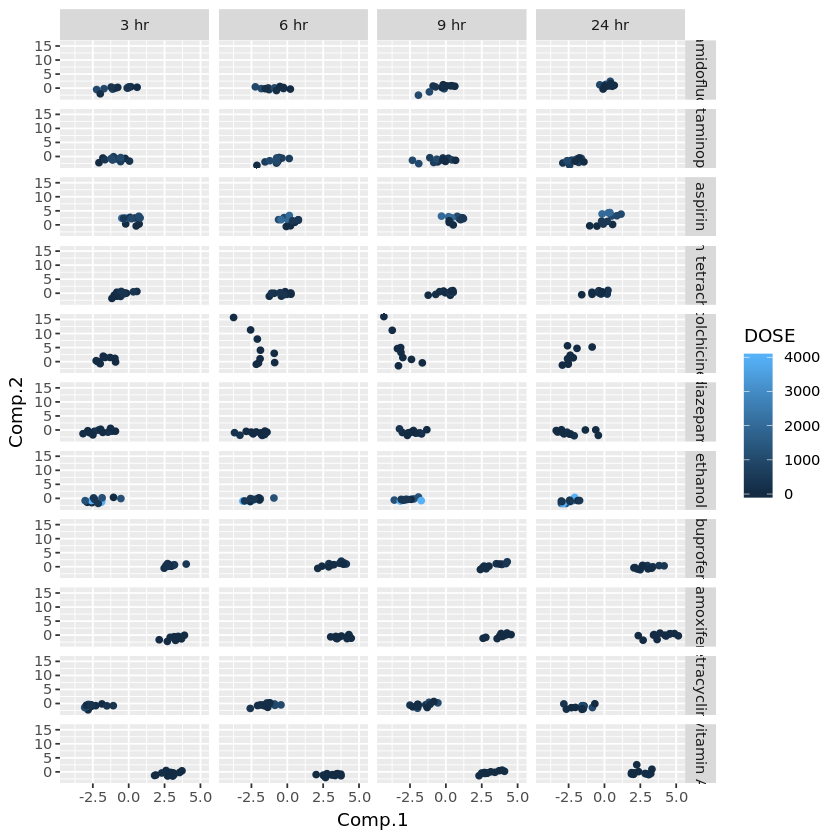

In [209]:
ggplot(biochem.pca) +
geom_point(aes(Comp.1,Comp.2,color=DOSE)) +
facet_grid(COMPOUND_NAME~SACRI_PERIOD)

In [210]:
pca.names <- colnames(biochem.pca)[1:2]

In [211]:
biochem.names <- names(dat.biochem)[10:30]

In [212]:
library(Hotelling)

Warning message:
"package 'Hotelling' was built under R version 3.6.1"Loading required package: corpcor
Warning message:
"package 'corpcor' was built under R version 3.6.1"

In [220]:
sigma <- cov(biochem.pca[,1:2])
sigma.inv <- solve(sigma)

t2.tests <- do.call(rbind,lapply(split(biochem.pca,factor(meta$COMPOUND_NAME)),function(dat.cpd){
    do.call(rbind,lapply(split(dat.cpd,factor(dat.cpd$SACRI_PERIOD)),function(dat.cpd.tp){
        dat.cpd.tp.dose.0 <- subset(dat.cpd.tp,DOSE==0)
        mat.cpd.tp.dose.0 <- dat.cpd.tp.dose.0[,pca.names]
        mean.cpd.tp.dose.0 <- apply(mat.cpd.tp.dose.0,2,mean)
        do.call(rbind,lapply(split(dat.cpd.tp,factor(dat.cpd.tp$DOSE)),function(dat.cpd.tp.dose){
            mat.cpd.tp.dose <- dat.cpd.tp.dose[,pca.names]
            mean.cpd.tp.dose <- apply(mat.cpd.tp.dose,2,mean)
            ht <- hotelling.test(mat.cpd.tp.dose,mat.cpd.tp.dose.0)
            data.frame(
                COMPOUND_NAME= dat.cpd.tp.dose$COMPOUND_NAME[1],
                SACRI_PERIOD=dat.cpd.tp.dose$SACRI_PERIOD[1],
                DOSE=dat.cpd.tp.dose$DOSE[1],
                stat=ht$stats$statistic*ht$stats$m,
                distance=mahalanobis(mean.cpd.tp.dose,mean.cpd.tp.dose.0,cov=sigma),
                pval=ht$pval
            )
        }))
    }))
}))

In [221]:
t2.tests$SACRI_PERIOD <- factor(t2.tests$SACRI_PERIOD,levels=levels(t2.tests$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(t2.tests$SACRI_PERIOD))))])

t2.tests$sig <- ''
t2.tests$sig[t2.tests$pval<=.1] <- '*'
t2.tests$sig[t2.tests$pval<=.05] <- '**'
t2.tests$sig[t2.tests$pval<=.01] <- '***'

In [224]:
subset(t2.tests,COMPOUND_NAME=='colchicine')

COMPOUND_NAME SACRI_PERIOD DOSE stat       distance  
colchicine.3 hr.0   colchicine    3 hr          0     0.000000  0.0000000
colchicine.3 hr.5   colchicine    3 hr          5     3.485383  0.2678286
colchicine.3 hr.15  colchicine    3 hr         15    13.412116  1.0322687
colchicine.6 hr.0   colchicine    6 hr          0     0.000000  0.0000000
colchicine.6 hr.5   colchicine    6 hr          5     5.098184  3.3172386
colchicine.6 hr.15  colchicine    6 hr         15    15.146294 46.5519471
colchicine.9 hr.0   colchicine    9 hr          0     0.000000  0.0000000
colchicine.9 hr.5   colchicine    9 hr          5     4.727716  4.0981775
colchicine.9 hr.15  colchicine    9 hr         15     4.624413 37.3886451
colchicine.24 hr.0  colchicine    24 hr         0     0.000000  0.0000000
colchicine.24 hr.5  colchicine    24 hr         5    11.772132  1.8300935
colchicine.24 hr.15 colchicine    24 hr        15   117.923359 11.4111191
                    pval        sig
colchicine.3 hr.0   1.000000000    
colchicine.3 hr.5   0.165039971    
colchicine.3 hr.15  0.031902738 ** 
colchicine.6 hr.0   1.000000000    
colchicine.6 hr.5   0.108392744    
colchicine.6 hr.15  0.027049583 ** 
colchicine.9 hr.0   1.000000000    
colchicine.9 hr.5   0.118207146    
colchicine.9 hr.15  0.121210480    
colchicine.24 hr.0  1.000000000    
colchicine.24 hr.5  0.037994949 ** 
colchicine.24 hr.15 0.001407677 ***

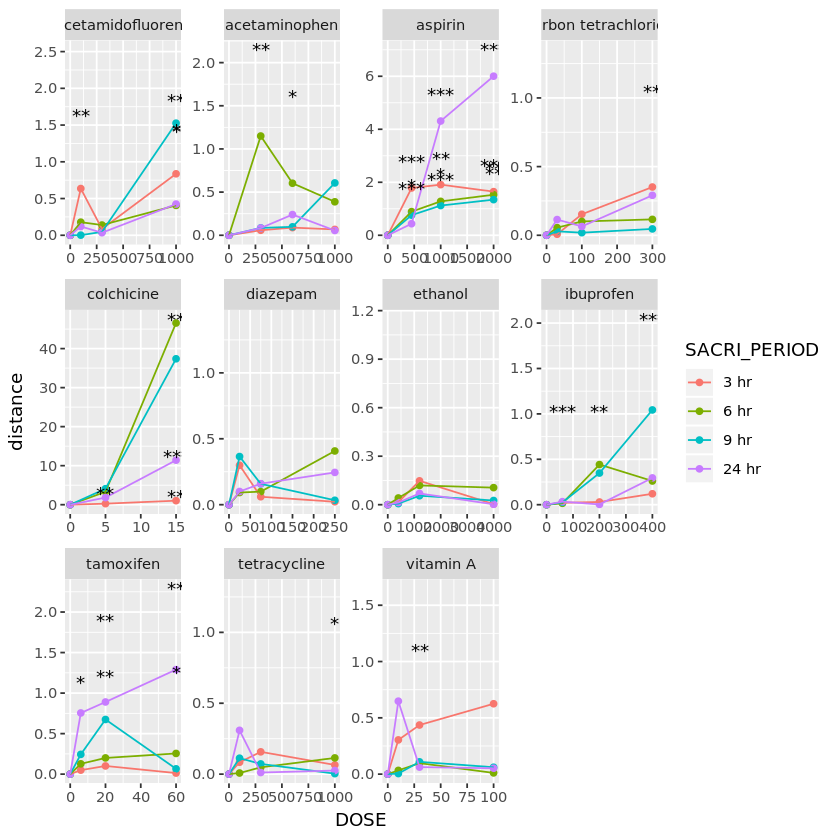

In [225]:
ggplot(t2.tests) +
geom_point(aes(DOSE,distance,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_line(aes(DOSE,distance,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_text(aes(DOSE,distance,label=sig)) +
facet_wrap('COMPOUND_NAME',scales='free')

# Re-plot using NN-derived PCs

In [246]:
dat.pred.pca <- read.csv('data/TGGATES/cel/rat/pred.pca.csv')
dat.pred.pca$SACRI_PERIOD <- factor(dat.pred.pca$SACRI_PERIOD,levels=levels(dat.pred.pca$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(dat.pred.pca$SACRI_PERIOD))))])

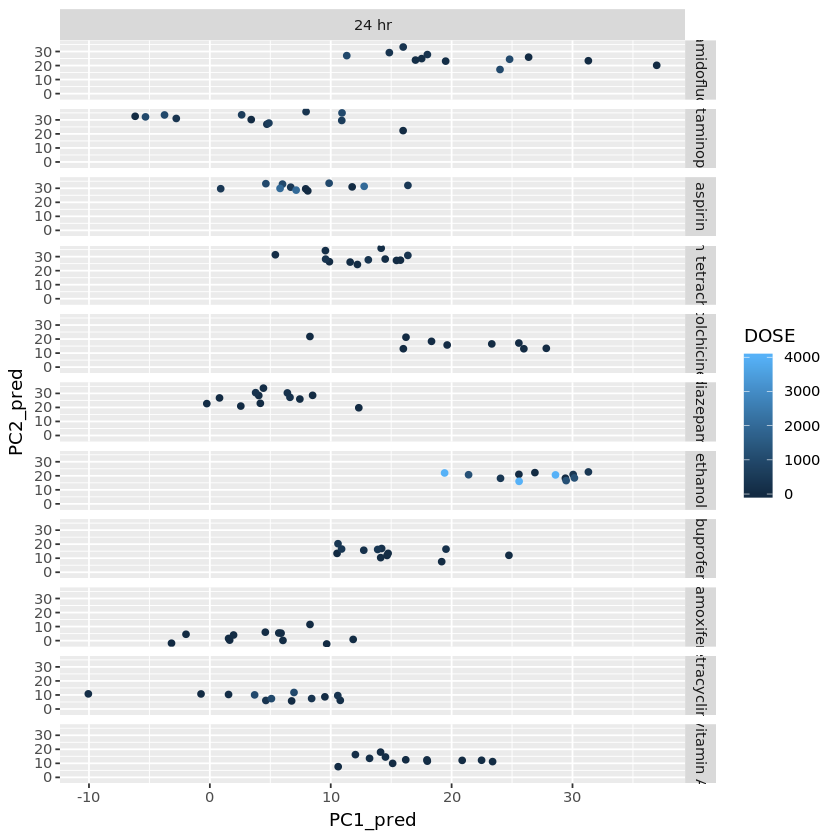

In [247]:
ggplot(dat.pred.pca) +
geom_point(aes(PC1_pred,PC2_pred,color=DOSE)) +
facet_grid(COMPOUND_NAME~SACRI_PERIOD)

In [248]:
pca.names <- c('PC1_pred','PC2_pred')

In [249]:
sigma <- cov(dat.pred.pca[,pca.names])
sigma.inv <- solve(sigma)

t2.tests <- do.call(rbind,lapply(split(dat.pred.pca,factor(dat.pred.pca$COMPOUND_NAME)),function(dat.cpd){
    do.call(rbind,lapply(split(dat.cpd,factor(dat.cpd$SACRI_PERIOD)),function(dat.cpd.tp){
        dat.cpd.tp.dose.0 <- subset(dat.cpd.tp,DOSE==0)
        mat.cpd.tp.dose.0 <- dat.cpd.tp.dose.0[,pca.names]
        mean.cpd.tp.dose.0 <- apply(mat.cpd.tp.dose.0,2,mean)
        do.call(rbind,lapply(split(dat.cpd.tp,factor(dat.cpd.tp$DOSE)),function(dat.cpd.tp.dose){
            mat.cpd.tp.dose <- dat.cpd.tp.dose[,pca.names]
            mean.cpd.tp.dose <- apply(mat.cpd.tp.dose,2,mean)
            ht <- hotelling.test(mat.cpd.tp.dose,mat.cpd.tp.dose.0)
            data.frame(
                COMPOUND_NAME= dat.cpd.tp.dose$COMPOUND_NAME[1],
                SACRI_PERIOD=dat.cpd.tp.dose$SACRI_PERIOD[1],
                DOSE=dat.cpd.tp.dose$DOSE[1],
                stat=ht$stats$statistic*ht$stats$m,
                distance=mahalanobis(mean.cpd.tp.dose,mean.cpd.tp.dose.0,cov=sigma),
                pval=ht$pval
            )
        }))
    }))
}))

In [250]:
t2.tests$SACRI_PERIOD <- factor(t2.tests$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

t2.tests$sig <- ''
t2.tests$sig[t2.tests$pval<=.1] <- '*'
t2.tests$sig[t2.tests$pval<=.05] <- '**'
t2.tests$sig[t2.tests$pval<=.01] <- '***'

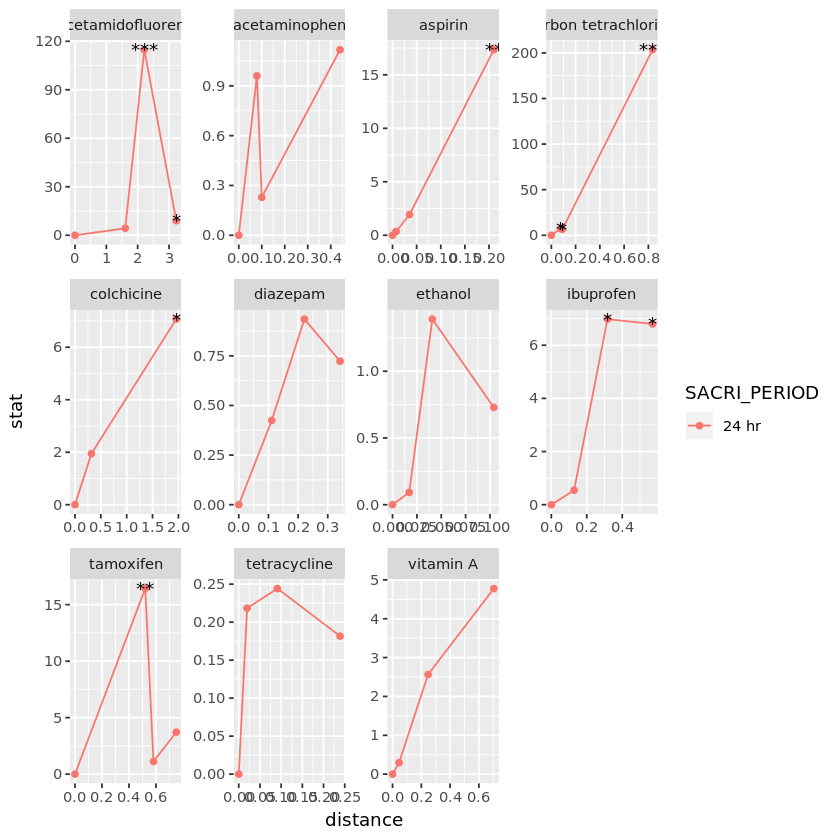

In [251]:
ggplot(t2.tests) +
geom_point(aes(distance,stat,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_line(aes(distance,stat,group=SACRI_PERIOD,color=SACRI_PERIOD)) +
geom_text(aes(distance,stat,label=sig)) +
facet_wrap('COMPOUND_NAME',scales='free')